In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

In [ ]:
import re
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
Stopwords = set(stopwords.words('english'))
wordlemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')
import spacy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
 cd sample_data/

/content/sample_data


In [ ]:
df = pd.read_excel('Training_Data.01 (1).xlsx')

In [6]:
df.describe()

,Company Name,Business Description,Industry Classification Tag
count,6045,6022,6045
unique,5989,5967,62
top,Aimia Inc,Urbana Corporation (Urbana) is a Canada-based ...,Regional Banks
freq,3,2,569


In [ ]:
df['Industry Classification Tag'].value_counts()
### 62 Unique Tags

Regional Banks                        569
Biotechnology                         402
Gold                                  373
Oil & Gas Exploration & Production    224
Application Software                  205
                                     ... 
Technology Distributors                51
Auto Parts & Equipment                 51
Real Estate Operating Companies        51
Internet Services & Infrastructure     50
Property & Casualty Insurance          50
Name: Industry Classification Tag, Length: 62, dtype: int64

In [7]:
sns.set(rc={'figure.figsize':(15,15)})

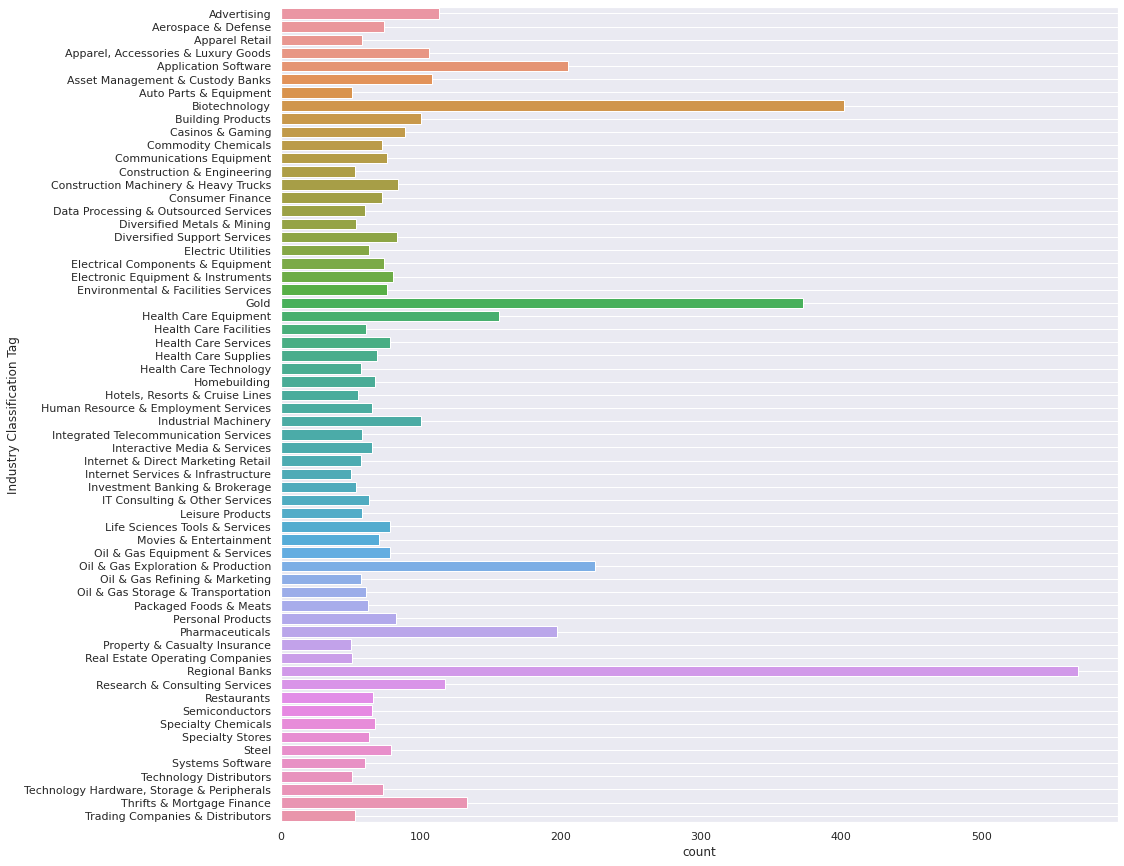

In [8]:
splot = sns.countplot(y = 'Industry Classification Tag', data=df)
plt.grid(axis = 'both')

In [9]:
df

,Company Name,Business Description,Industry Classification Tag
0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising
1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising
2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising
3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising
4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising
...,...,...,...
6040,Willis Lease Finance Corporation,Willis Lease Finance Corporation along with it...,Trading Companies & Distributors
6041,WindGen Energy Inc,"WindGen Energy, Inc. (WindGen) is focused on w...",Trading Companies & Distributors
6042,XLI Technologies Inc,"XLI Technologies, Inc., formerly Mineria Y Exp...",Trading Companies & Distributors
6043,"Armco Metals Holdings, Inc.","Armco Metals Holdings, Inc. is a scrap steel p...",Trading Companies & Distributors


In [10]:
### Preprocessing Functions

def lemmatize_words(words):       ###Lemmatizing
    lemmatized_words = []
    for word in words:
        lemmatized_words.append(wordlemmatizer.lemmatize(word))
    return lemmatized_words

def stem_words(words):          ####Stemming
    stemmed_words = []
    for word in words:
        stemmed_words.append(stemmer.stem(word))
    return stemmed_words


def remove_special_characters(text):          ####Special char removal
    regex = r'[^a-zA-Z0-9\s]'
    text = re.sub(regex,'',text)
    return text

def lower(text):
    return text.lower()

In [11]:
### Calculating the frequency of each word in the document
def freq(words):
    words = [word.lower() for word in words]
    dict_freq = {}
    words_unique = []
    for word in words:
        if word not in words_unique:
            words_unique.append(word)
    for word in words_unique:
        dict_freq[word] = words.count(word)
    return dict_freq

In [12]:
def pos_tagging(text):
    pos_tag = nltk.pos_tag(text.split())
    pos_tagged_noun_verb = []
    for word,tag in pos_tag:
        if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
             pos_tagged_noun_verb.append(word)
    return pos_tagged_noun_verb
### Note : The above function returns only the nouns and verbs from the text. 

In [13]:
cmpny_type = []
for i in range(0,len(df)):
    text = lower(df['Company Name'][i])
    text = remove_special_characters(text)
    tknize = word_tokenize(text)
    cmpny_type.append(tknize.pop())

In [14]:
df['Company_Type'] = cmpny_type

In [15]:
df

,Company Name,Business Description,Industry Classification Tag,Company_Type
0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising,inc
1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising,inc
2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising,corp
3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising,corp
4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising,inc
...,...,...,...,...
6040,Willis Lease Finance Corporation,Willis Lease Finance Corporation along with it...,Trading Companies & Distributors,corporation
6041,WindGen Energy Inc,"WindGen Energy, Inc. (WindGen) is focused on w...",Trading Companies & Distributors,inc
6042,XLI Technologies Inc,"XLI Technologies, Inc., formerly Mineria Y Exp...",Trading Companies & Distributors,inc
6043,"Armco Metals Holdings, Inc.","Armco Metals Holdings, Inc. is a scrap steel p...",Trading Companies & Distributors,inc


In [16]:
df['Company_Type'] = df['Company_Type'].replace({'corporation': 'corp', 'limited': 'ltd' , 'bancorporation': 'bancorp' })

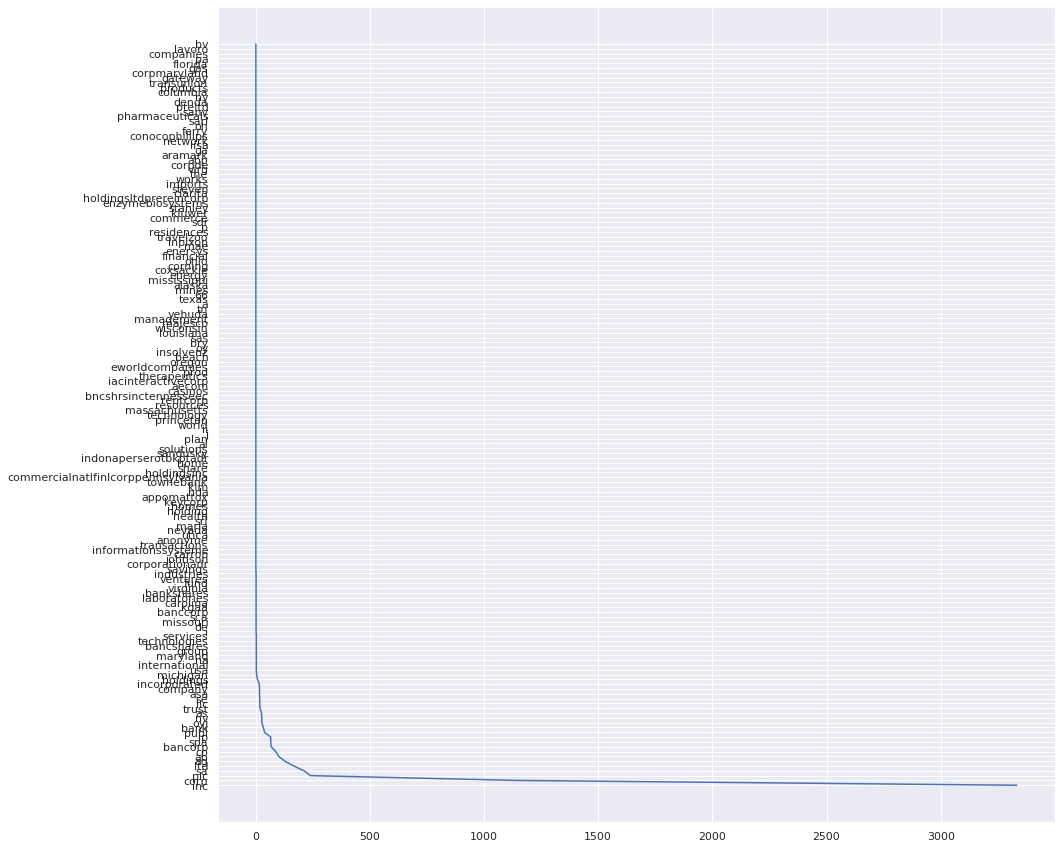

In [17]:
plt.plot((df['Company_Type'].value_counts()).tolist() , (df['Company_Type'].value_counts()).index.tolist())
plt.rcParams["figure.figsize"]=(40, 40)

In [18]:
(df['Company_Type'].value_counts())[:19]

inc        3333
corp       1146
plc         240
sa          212
ltd         167
ag          128
ab          101
co           88
bancorp      68
spa          66
lp           66
publ         39
bank         34
oyj          27
nv           27
as           26
trust        19
llc          18
se           18
Name: Company_Type, dtype: int64

In [19]:
np.sum((df['Company_Type'].value_counts())[:19].tolist())/len(df)  ###~96% companies corresponding to these 19 tags

0.9632754342431762

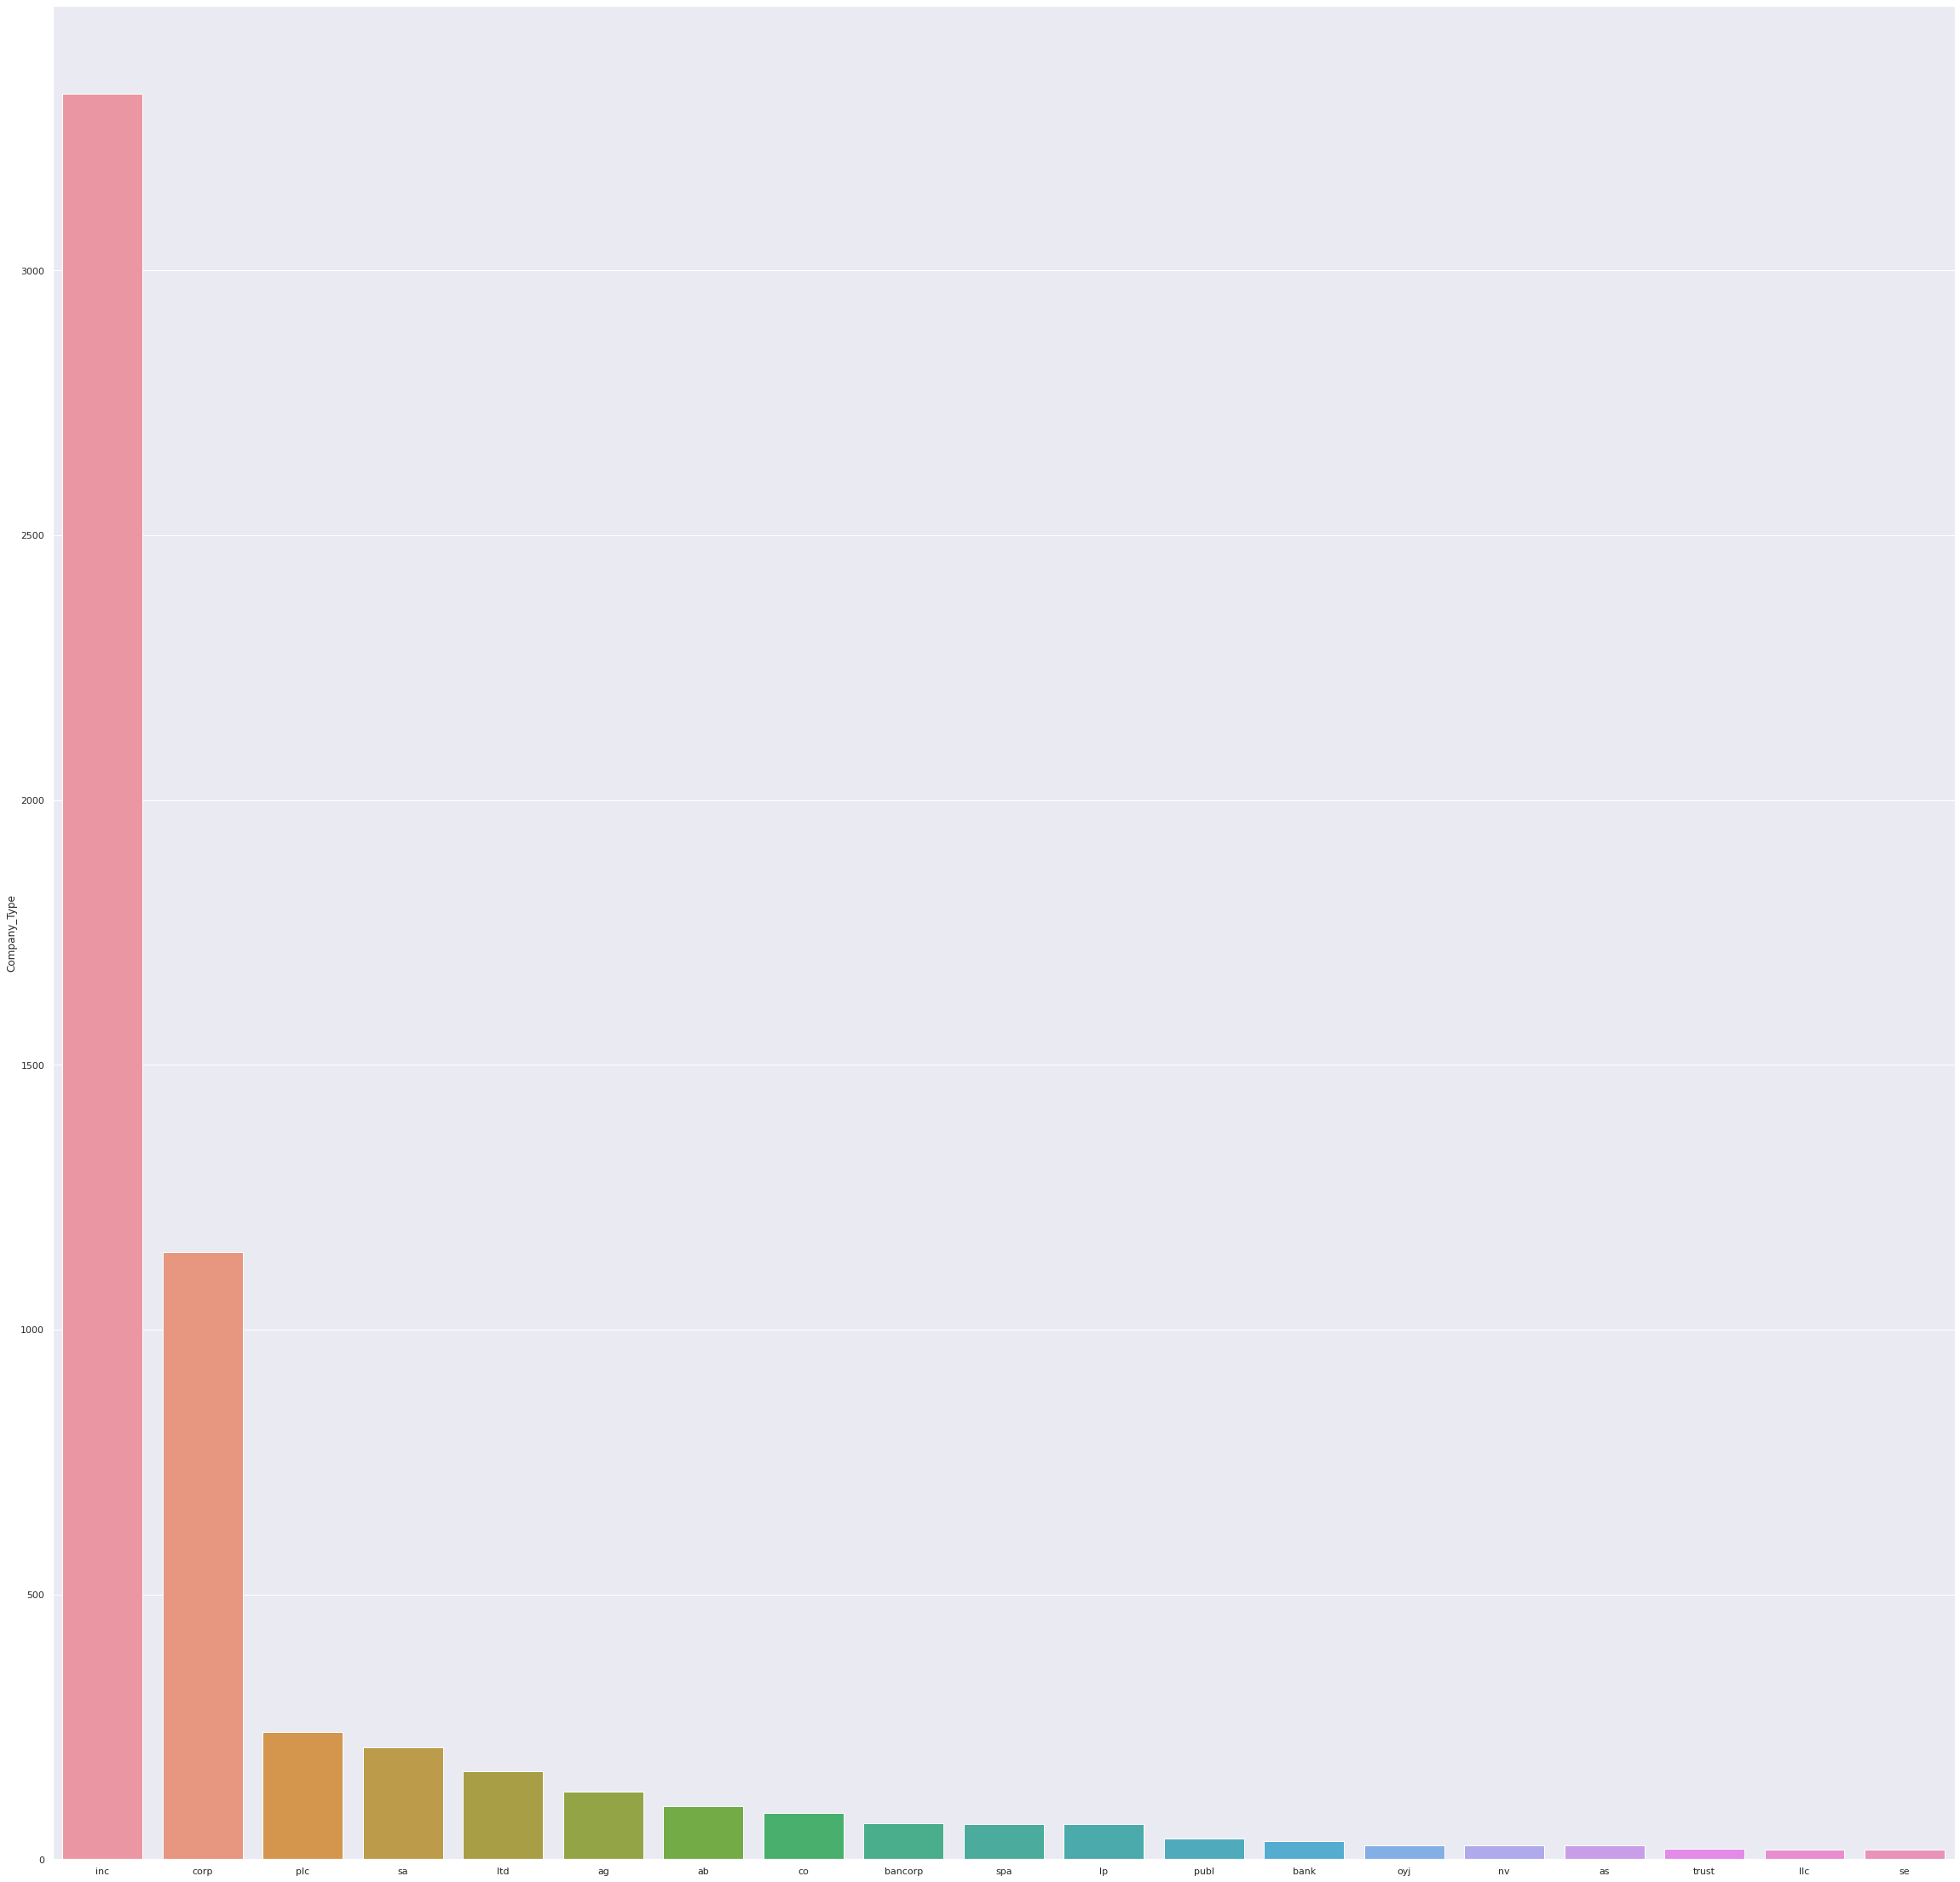

In [20]:
sns.barplot(x=(df['Company_Type'].value_counts())[:19].index, y=(df['Company_Type'].value_counts())[:19])
plt.rcParams["figure.figsize"]=(5, 5)

In [21]:
grpby_tags = dict(tuple(df.groupby('Industry Classification Tag')))
### Grouping Companies by the industry/Tag they belong to 

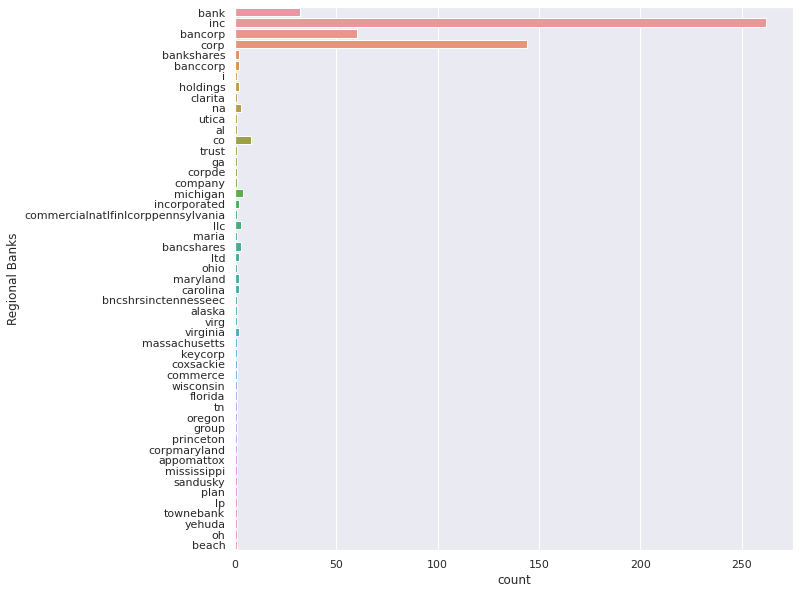

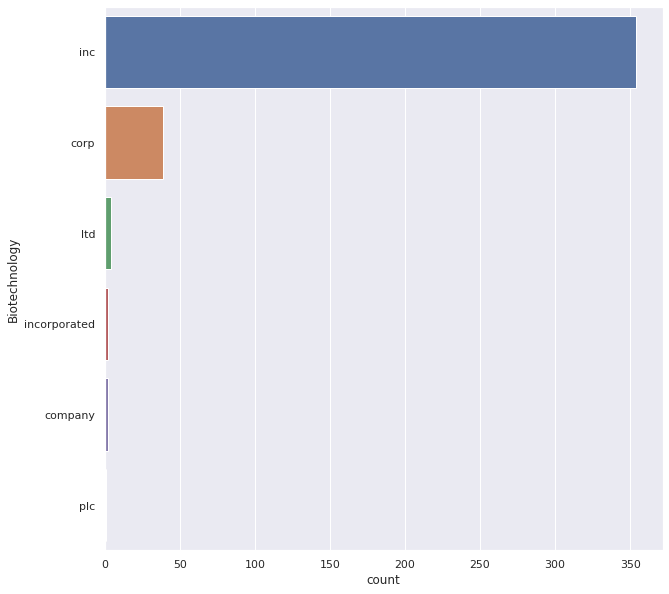

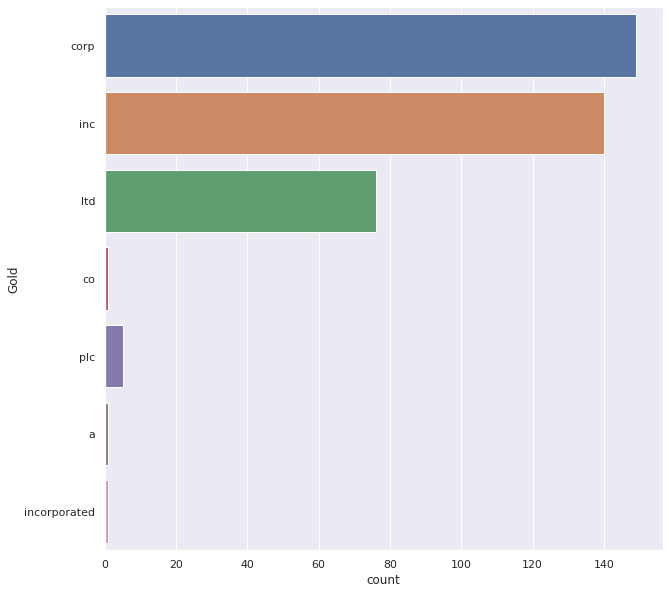

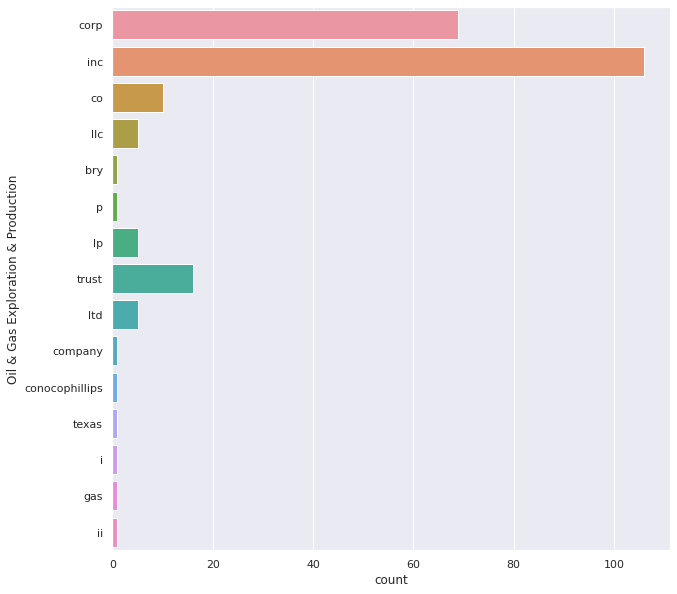

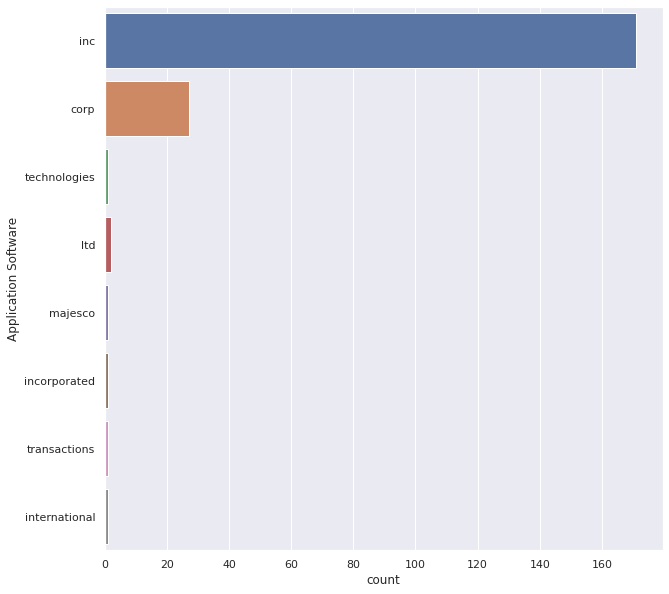

In [22]:
plt.rcParams["figure.figsize"]=(10, 10)
for i in ['Regional Banks','Biotechnology','Gold','Oil & Gas Exploration & Production','Application Software']:
    plt.figure()
    ax = sns.countplot(y = 'Company_Type', data = grpby_tags[i])
    ax.set_ylabel(i)

In [23]:
df.isnull().sum()

Company Name                    0
Business Description           23
Industry Classification Tag     0
Company_Type                    0
dtype: int64

In [24]:
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [25]:
df

,index,Company Name,Business Description,Industry Classification Tag,Company_Type
0,0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising,inc
1,1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising,inc
2,2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising,corp
3,3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising,corp
4,4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising,inc
...,...,...,...,...,...
6017,6040,Willis Lease Finance Corporation,Willis Lease Finance Corporation along with it...,Trading Companies & Distributors,corp
6018,6041,WindGen Energy Inc,"WindGen Energy, Inc. (WindGen) is focused on w...",Trading Companies & Distributors,inc
6019,6042,XLI Technologies Inc,"XLI Technologies, Inc., formerly Mineria Y Exp...",Trading Companies & Distributors,inc
6020,6043,"Armco Metals Holdings, Inc.","Armco Metals Holdings, Inc. is a scrap steel p...",Trading Companies & Distributors,inc


In [26]:
countries_seq = []
for i in range(0,len(df)):
    doc=nlp(df['Business Description'][i])
    countries_seq.append([X.text for X in doc.ents if X.label_ == 'GPE'])

In [27]:
df['Country'] = countries_seq

In [28]:
df

,index,Company Name,Business Description,Industry Classification Tag,Company_Type,Country
0,0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising,inc,[Florida]
1,1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising,inc,[]
2,2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising,corp,[GoFish]
3,3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising,corp,"[Alabama, Florida, Georgia, West Virginia, Wis..."
4,4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising,inc,[]
...,...,...,...,...,...,...
6017,6040,Willis Lease Finance Corporation,Willis Lease Finance Corporation along with it...,Trading Companies & Distributors,corp,[]
6018,6041,WindGen Energy Inc,"WindGen Energy, Inc. (WindGen) is focused on w...",Trading Companies & Distributors,inc,"[Boulder City, Nevada, the United States, Cana..."
6019,6042,XLI Technologies Inc,"XLI Technologies, Inc., formerly Mineria Y Exp...",Trading Companies & Distributors,inc,"[the United States, Canada, the United States]"
6020,6043,"Armco Metals Holdings, Inc.","Armco Metals Holdings, Inc. is a scrap steel p...",Trading Companies & Distributors,inc,[China]


In [29]:
import itertools as it
mk_a_plot = list(map(str, it.chain.from_iterable(countries_seq)))

In [30]:
from collections import defaultdict
fq= defaultdict( int )
for w in mk_a_plot:
    fq[w] += 1

In [31]:
cntry_freq = {k: v for k, v in sorted(fq.items(), key=lambda item: item[1] , reverse = True)}

In [32]:
cntry_freq

{'the United States': 1016,
 'Canada': 856,
 'Texas': 268,
 'France': 253,
 'Germany': 252,
 'Sweden': 232,
 'the United Kingdom': 218,
 'Nevada': 211,
 'United States': 202,
 'Mexico': 186,
 'California': 158,
 'China': 156,
 'Australia': 150,
 'United Kingdom': 145,
 'Italy': 143,
 'Spain': 129,
 'Ontario': 118,
 'Florida': 116,
 'Finland': 112,
 'New York': 103,
 'Switzerland': 101,
 'Pennsylvania': 99,
 'Colorado': 96,
 'Brazil': 94,
 'British Columbia': 93,
 'Oklahoma': 92,
 'Ohio': 92,
 'Arizona': 80,
 'Denmark': 78,
 'Greece': 77,
 'Louisiana': 76,
 'Norway': 75,
 'Washington': 71,
 'India': 70,
 'Virginia': 68,
 'Poland': 67,
 'New Jersey': 67,
 'Quebec': 67,
 'Japan': 66,
 'Belgium': 61,
 'Kansas': 59,
 'Illinois': 58,
 'Kentucky': 56,
 'Georgia': 55,
 'New Mexico': 54,
 'Utah': 54,
 'Wyoming': 53,
 'Tennessee': 53,
 'Peru': 52,
 'Indiana': 52,
 'Maryland': 51,
 'U.S.': 49,
 'Massachusetts': 49,
 'Alaska': 49,
 'North Dakota': 49,
 'Alabama': 48,
 'South Carolina': 47,
 'Colom

In [33]:
top_twntyfive = dict(itertools.islice(cntry_freq.items(), 25))

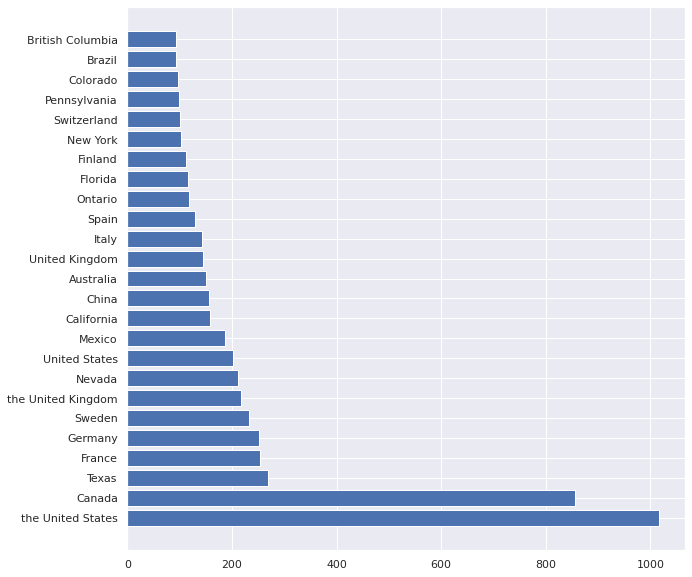

In [34]:
plt.barh(range(len(top_twntyfive)), list(top_twntyfive.values()), align='center')
plt.yticks(range(len(top_twntyfive)), list(top_twntyfive.keys()))
plt.show()

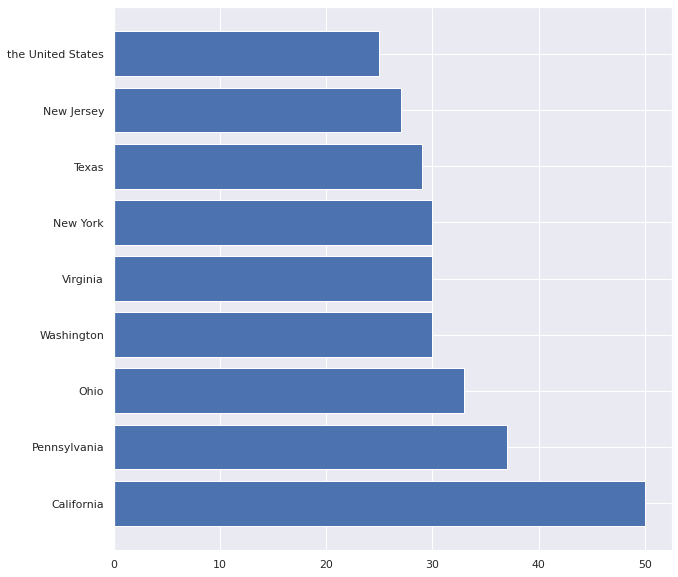

In [35]:
grpby_tags = dict(tuple(df.groupby('Industry Classification Tag')))
### Grouping Companies by the industry/Tag they belong to 

cnty_list = []
for i in ['Regional Banks']: 
    for j in range(grpby_tags[i].index[0] , grpby_tags[i].index[-1]):
        cnty_list.append(','.join(grpby_tags[i]['Country'][j]).split(','))
        flatList = []
        for elem in cnty_list:
            flatList.extend(elem)



from collections import defaultdict
fq_2 = defaultdict( int )
for w in flatList:
    fq_2[w] += 1
    
regbank_freq = {k: v for k, v in sorted(fq_2.items(), key=lambda item: item[1] , reverse = True)}
top_ten = dict(itertools.islice(regbank_freq.items(), 10))
top_ten.pop('')  ##Highest Ones are blank labels
plt.barh(range(len(top_ten)), list(top_ten.values()), align='center')
plt.yticks(range(len(top_ten)), list(top_ten.keys()))
plt.show()

### Maximum Regional Banks are based in California followed by other. 
### Similar plots can be obtained for every Industry Type(Advertising, Oils, Pharma,etc)

In [36]:
### Wordcloud Representation for each Industry Tag
### Top keywords per Industry


In [42]:
#ls
#!cd ..

 anscombe.json		        mnist_train_small.csv
 california_housing_test.csv    README.md
 california_housing_train.csv  'Training_Data.01 (1).xlsx'
 mnist_test.csv


In [45]:
!git clone https://github.com/CRIPAC-DIG/TextING.git

Cloning into 'TextING'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 191 (delta 52), reused 65 (delta 27), pack-reused 99
Receiving objects: 100% (191/191), 194.52 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Checking out files: 100% (44/44), done.


In [46]:
cd TextING/

/content/TextING


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
!python remove_words.py Company

using default least word frequency = 5
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'above', "it's", 't', 'for', 'been', 'until', 'being', 'each', 'theirs', 'had', 'but', "hasn't", 'their', "wasn't", 'this', "weren't", 'have', 'our', 'its', "you've", 'should', 'didn', 'me', 'yourself', 'that', 'were', 'my', 'ourselves', 'than', 'by', 'weren', 'what', 'who', 'because', 'm', 're', 'be', "you'll", 'couldn', 'herself', 'about', "don't", 'aren', "couldn't", 'won', 'mustn', 'his', 'll', 'wasn', 'only', 'between', 've', 'those', 'more', "didn't", "that'll", 'then', 'myself', 'your', 'hers', 'below', 'in', 'both', 'few', 'doesn', 'other', 'needn', "doesn't", 'on', 'here', 'any', 'before', 'she', 'how', 'of', 's', 'it', 'an', 'shan', 'has', "hadn't", 'same', 'there', 'i', 'haven', 'he', 'you', "wouldn't", 'wouldn', "should've", 'from', 'shouldn', 'as', 'up', 'o', 'not', 'at', 'did', 'too', "aren't", 'these', 'y', 'hadn',

In [49]:
!python build_graph.py Company 3

using default unweighted graph
loading raw data
building graphs for training
100% 4347/4347 [00:05<00:00, 777.34it/s] 
building graphs for training + validation
100% 4829/4829 [00:04<00:00, 1076.15it/s]
building graphs for test
100% 1193/1193 [00:01<00:00, 1021.32it/s]
max_doc_length 90 min_doc_length 2 average 56.40
training_vocab 8541 test_vocab 5552 intersection 5419


In [97]:
!python train.py [--dataset Company] [--learning_rate 0.005] [--epochs 200] [--batch_size 4096] [--hidden 64] [--steps 2] [--dropout 0.5] [--weight_decay 0]

2021-02-14 06:55:37.343789: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/content/TextING/utils.py:82: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train_adj = np.array(train_adj)
/content/TextING/utils.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  val_adj = np.array(val_adj)
/content/TextING/utils.py:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is 